# ASSIGNMENT : 1

# NAME : UJJWAL SHARMA

# ROLL NO : 2020a1r116

MovieLens 1M Dataset GroupLens Research provides a number of collections of movie ratings data collected from users of
MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata (genres and year), and 
demographic data about the users (age, zip code, gender identification, and occupation). Such data is often of interest in 
the development of recommendation systems based on machine learning algorithms. While we do not explore machine learning 
techniques in detail in this book, I will show you how to slice and dice datasets like these into the exact form you need. 
The MovieLens 1M dataset contains 1 million ratings collected from 6,000 users on 4,000 movies. It’s spread across three
tables: ratings, user information, and movie information. After extracting the data from the ZIP file, we can load each 
table into a pandas DataFrame object using pandas.read_table and perform the following task.

# 1.    Perform null values identification in the given dataset.

In [16]:
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/user/OneDrive/Desktop/diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
null_values = df.isnull().sum()
print(null_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# 2.    Identify types of attributes in the dataset.

In [6]:
attribute_types = df.dtypes
print(attribute_types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


# 3.    Plot Box plot and violin plot. (also state the inference of each attribute and also find the outlier in the attribute)

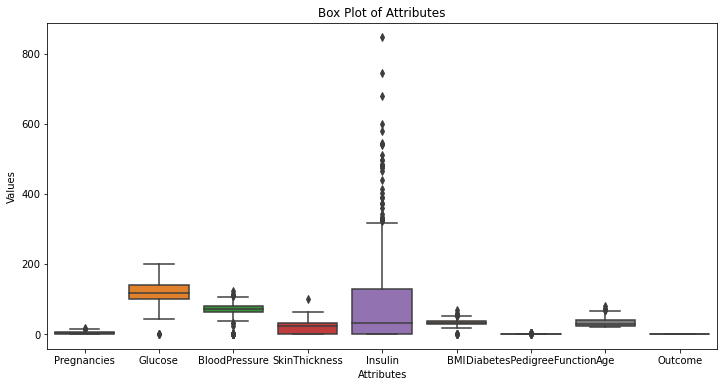

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# CREATE BOX PLOTS
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

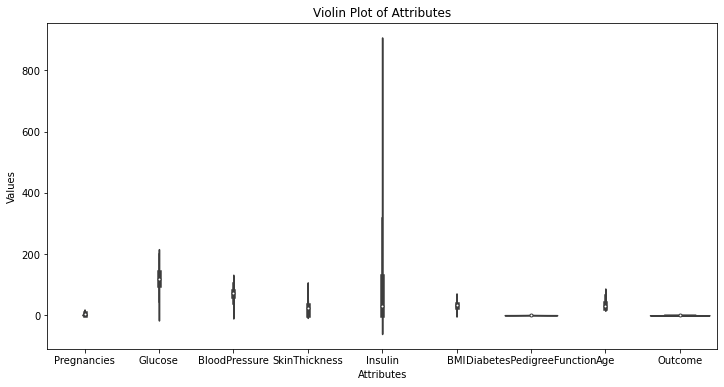

In [9]:
# CREATE VIOLIN PLOTS
plt.figure(figsize=(12, 6))
sns.violinplot(data=df)
plt.title('Violin Plot of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.show()

In [10]:
# IDENTIFY OUTLIER USING BOX PLOTS
for column in df.columns:
    if df[column].dtype != 'object':  # Exclude non-numeric attributes
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if outliers.shape[0] > 0:
            print(f"Outliers in attribute '{column}':")
            print(outliers)

Outliers in attribute 'Pregnancies':
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  
Outliers in attribute 'Glucose':
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0        

In [11]:
# IDENTIFY INFERENCE FOR EACH ATTRIBUTE
for column in df.columns:
    if df[column].dtype == 'object':  # CATEGORICAL ATTRIBUTES
        print(f"Attribute '{column}' is a categorical attribute.")
        print(f"Unique values: {df[column].unique()}")
    else:  # NUMERIC ATTRIBUTES
        print(f"Attribute '{column}' is a numeric attribute.")
        print(f"Summary statistics: {df[column].describe()}")

Attribute 'Pregnancies' is a numeric attribute.
Summary statistics: count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
Attribute 'Glucose' is a numeric attribute.
Summary statistics: count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
Attribute 'BloodPressure' is a numeric attribute.
Summary statistics: count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
Attribute 'SkinThickness' is a numeric attribute.
Summary statistics: count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max     

# 4.    Histogram and identification of overlapping.(also state the inference for each attribute.)

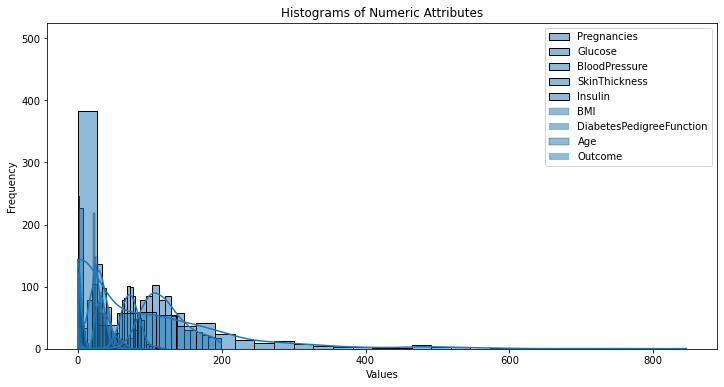

In [14]:
# CREATE HISTOGRAM
plt.figure(figsize=(12, 6))
for column in df.columns:
    if df[column].dtype != 'object':  # Exclude non-numeric attributes
        sns.histplot(df[column], kde=True, label=column)
plt.title('Histograms of Numeric Attributes')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [13]:
# IDENTIFY OVERLAPPING
for column1 in df.columns:
    for column2 in df.columns:
        if column1 != column2 and df[column1].dtype != 'object' and df[column2].dtype != 'object':  # Exclude non-numeric attributes
            overlap = df[(df[column1] > df[column2].min()) & (df[column1] < df[column2].max())]
            if overlap.shape[0] > 0:
                print(f"Overlapping between '{column1}' and '{column2}':")
                print(overlap)


Overlapping between 'Pregnancies' and 'Glucose':
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0               

In [15]:
# IDENTIFY INFERENCE FOR EACH ATTRIBUTE
for column in df.columns:
    if df[column].dtype == 'object':  # CATEGORICAL ATTRIBUTES
        print(f"Attribute '{column}' is a categorical attribute.")
        print(f"Unique values: {df[column].unique()}")
    else:  # NUMERIC ATTRIBUTES
        print(f"Attribute '{column}' is a numeric attribute.")
        print(f"Summary statistics: {df[column].describe()}")

Attribute 'Pregnancies' is a numeric attribute.
Summary statistics: count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
Attribute 'Glucose' is a numeric attribute.
Summary statistics: count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
Attribute 'BloodPressure' is a numeric attribute.
Summary statistics: count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
Attribute 'SkinThickness' is a numeric attribute.
Summary statistics: count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max     

# 5.    Draw different types of scatter plot.(using seaborn library) 

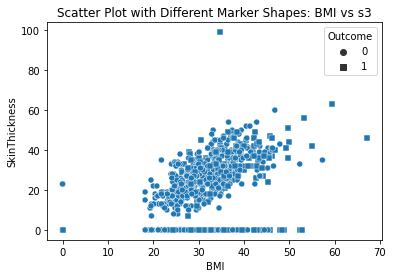

In [29]:
# SCATTER PLOT WITH SINGLE VARIABLES(UNIVARIATE SCATTER PLOT)
sns.scatterplot(x='Age', y='BMI', data=df)
plt.title('Scatter Plot: Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

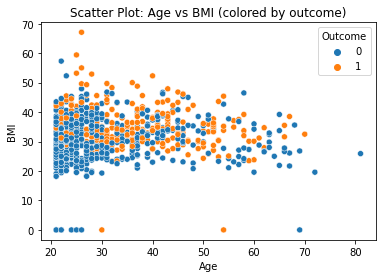

In [30]:
# SCATTER PLOT WITH TWO VARIABLES(BIVARIATE SCATTER PLOT)
sns.scatterplot(x='Age', y='BMI', hue='Outcome', data=df)
plt.title('Scatter Plot: Age vs BMI (colored by outcome)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

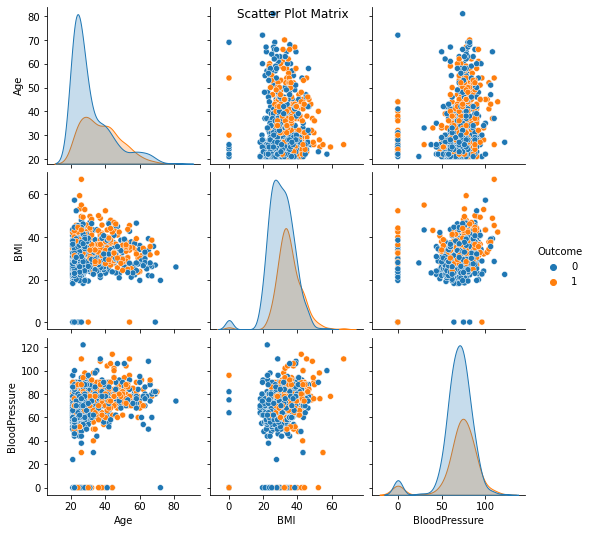

In [31]:
# SCATTER PLOT MATRIX(PAIRPLOT)
sns.pairplot(data=df, vars=['Age', 'BMI', 'BloodPressure'], hue='Outcome')
plt.suptitle('Scatter Plot Matrix')
plt.show()

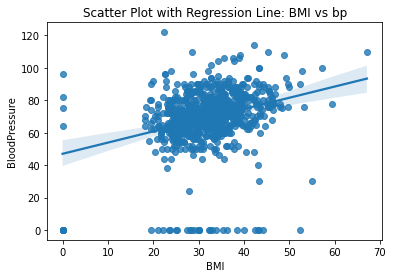

In [32]:
# SCATTER PLOT WITH REGRESSION LINE(REGRESSION PLOT)
sns.regplot(x='BMI', y='BloodPressure', data=df)
plt.title('Scatter Plot with Regression Line: BMI vs bp')
plt.xlabel('BMI')
plt.ylabel('BloodPressure')
plt.show()

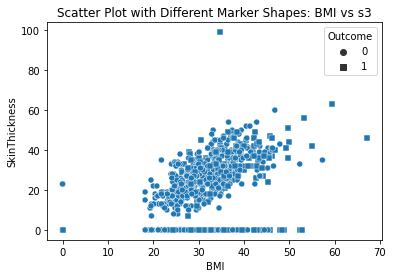

In [33]:
# SCATTER PLOT WITH DIFFERENT MARKER SHAPES(SCATTER PLOT WITH MARKER PARAMETER)
sns.scatterplot(x='BMI', y='SkinThickness', data=df, style='Outcome', markers=['o', 's'])
plt.title('Scatter Plot with Different Marker Shapes: BMI vs SkinThickness')
plt.xlabel('BMI')
plt.ylabel('SkinThickness')
plt.show()

# 6.    Univariate and multivariate analysis.

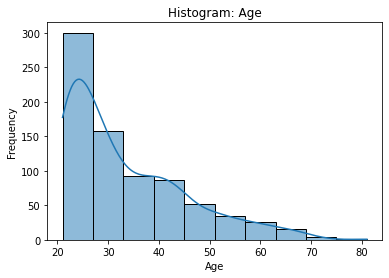

In [41]:
# UNIVARIATE ANALYSIS: HISTOGRAM
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Histogram: Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

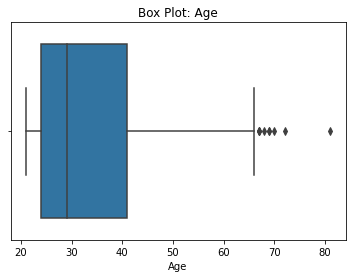

In [40]:
# UNIVARIATE ANALYSIS: BOX PLOT
sns.boxplot(x='Age', data=df)
plt.title('Box Plot: Age')
plt.xlabel('Age')
plt.show()

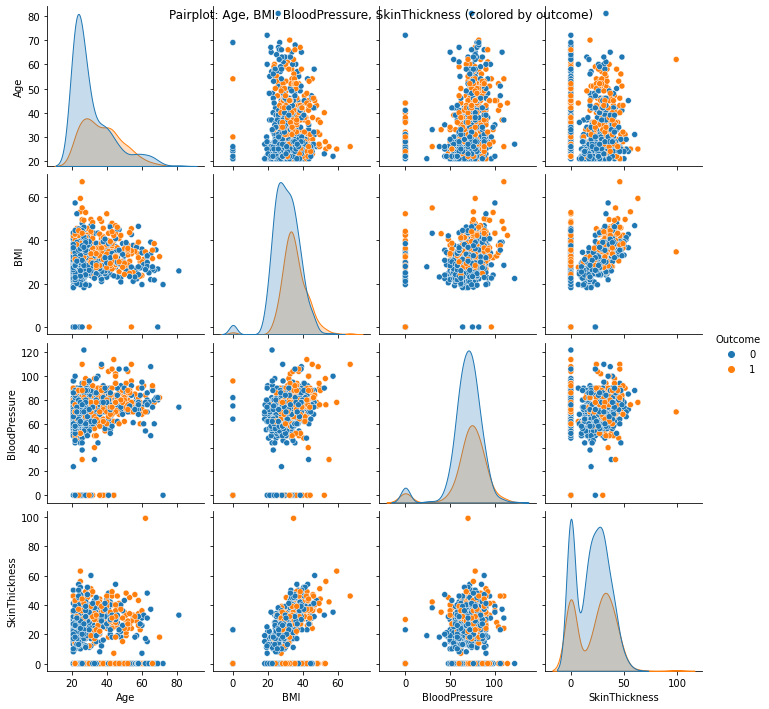

In [42]:
# MULTIVARIATE ANALYSIS: PAIRPLOT
sns.pairplot(data=df, hue='Outcome', vars=['Age', 'BMI', 'BloodPressure', 'SkinThickness'])
plt.suptitle('Pairplot: Age, BMI, BloodPressure, SkinThickness (colored by outcome)')
plt.show()

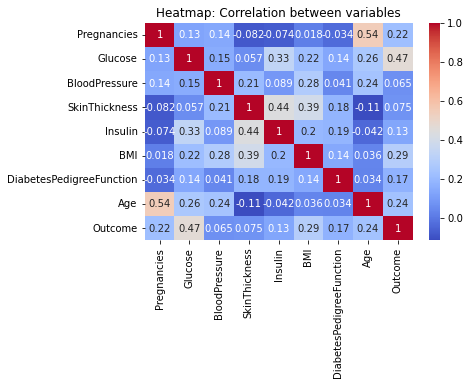

In [43]:
# MULTIVARIATE ANALYSIS: HEATMAP
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation between variables')
plt.show()

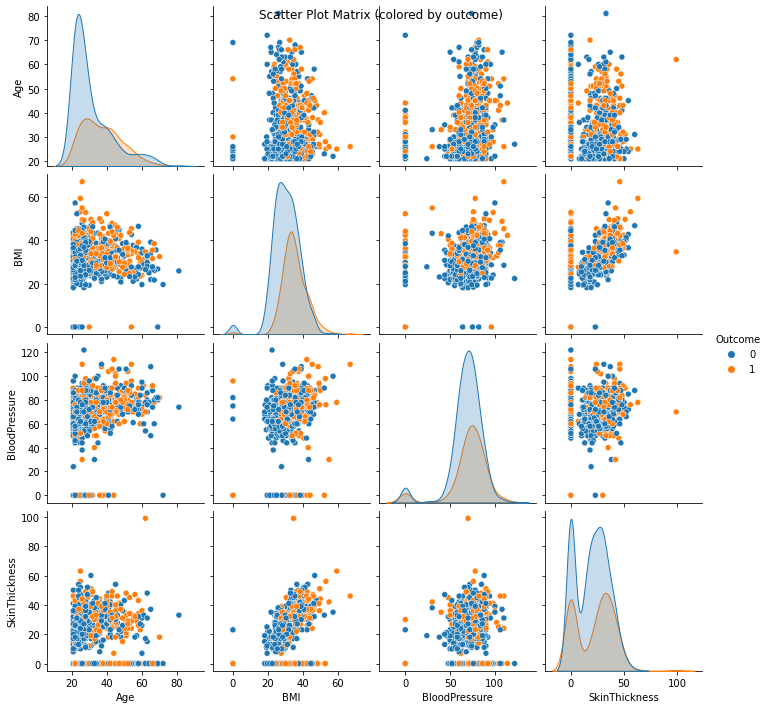

In [44]:
# MULTIVARIATE ANALYSIS: SCATTER PLOT MATRIX
sns.pairplot(data=df, vars=['Age', 'BMI', 'BloodPressure', 'SkinThickness'], hue='Outcome')
plt.suptitle('Scatter Plot Matrix (colored by outcome)')
plt.show()

# 2. Diabetics datasets :
Data Exploration: This includes inspecting the data, visualizing the data, and cleaning the data. Some of the steps used are as follows:

### 1. Viewing the data statistics.

In [52]:
# VIEW THE FIRST FEW ROWS OF THE DATA
print("Head of the data:")
print(df.head())

Head of the data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [47]:
# VIEW THE DATA STATISTICS
print("Data statistics:")
print(df.describe())

Data statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000 

In [48]:
# View the data types of each column
print("Data types:")
print(df.dtypes)

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [49]:
# VIEW THE SHAPE OF THE DATA (NUMBER OF ROWS AND COLUMNS)
print("Data shape:")
print(df.shape)

Data shape:
(768, 9)


In [50]:
# VIEW THE COLUMN NAMES
print("Column names:")
print(df.columns)

Column names:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [51]:
# VIEW THE NUMBER OF MISSING VALUES IN EACH COLUMN
print("Missing values:")
print(df.isnull().sum())

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### 2. Finding out the dimensions of the dataset, the variable names, the data types, etc.

In [59]:
# VIEW THE SHAPE OF THE DATA (NUMBER OF ROWS AND COLUMNS)
print("Data shape:")
print(df.shape)

Data shape:
(768, 9)


In [57]:
# VIEW THE COLUMN NAMES
print("Column names:")
print(df.columns)

Column names:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [58]:
# VIEW THE DATA TYPES OF EACH COLUMN
print("Data types:")
print(df.dtypes)

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### 3. Checking for null values.

In [62]:
# CHECK FOR MISSING VALUES IN EACH COLUMN
print("Missing values:")
print(df.isnull().sum())

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### 4. Inspecting the target variable using pie plot and count plot.

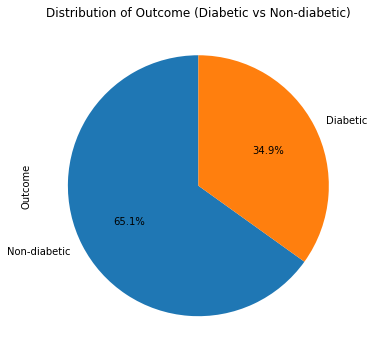

In [65]:
# INSPECT THE TARGET VARIABLE (e.g., 'Outcome') USING A PIE PLOT
plt.figure(figsize=(6, 6))
df['Outcome'].value_counts().plot.pie(labels=['Non-diabetic', 'Diabetic'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Outcome (Diabetic vs Non-diabetic)')
plt.show()

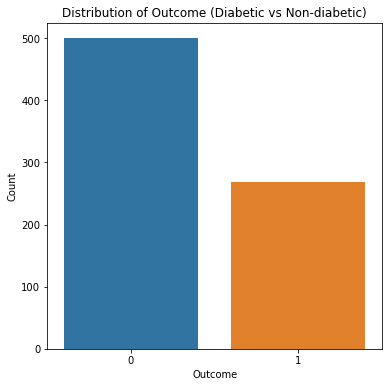

In [66]:
# INSPECT THE TARGET VARIABLE USING A COUNT PLOT
plt.figure(figsize=(6, 6))
sns.countplot(x='Outcome', data=df)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome (Diabetic vs Non-diabetic)')
plt.show()

### 5. Finding out the correlation among different features using heatmap and the bivariate relation between each pair of features using pair plot.

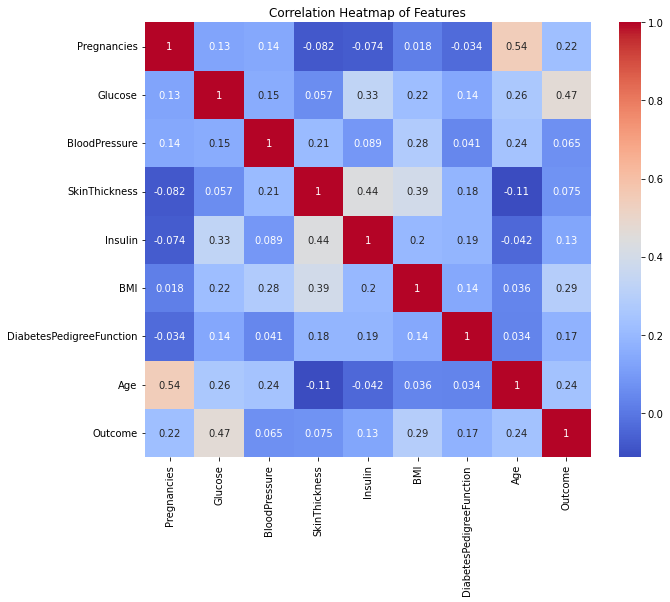

In [70]:
# COMPUTE THE CORRELATION MATRIX AMONG FEATURES
corr_matrix = df.corr()

# CREATE A HEATMAP TO VISUALIZE THE CORRELATION MATRIX
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

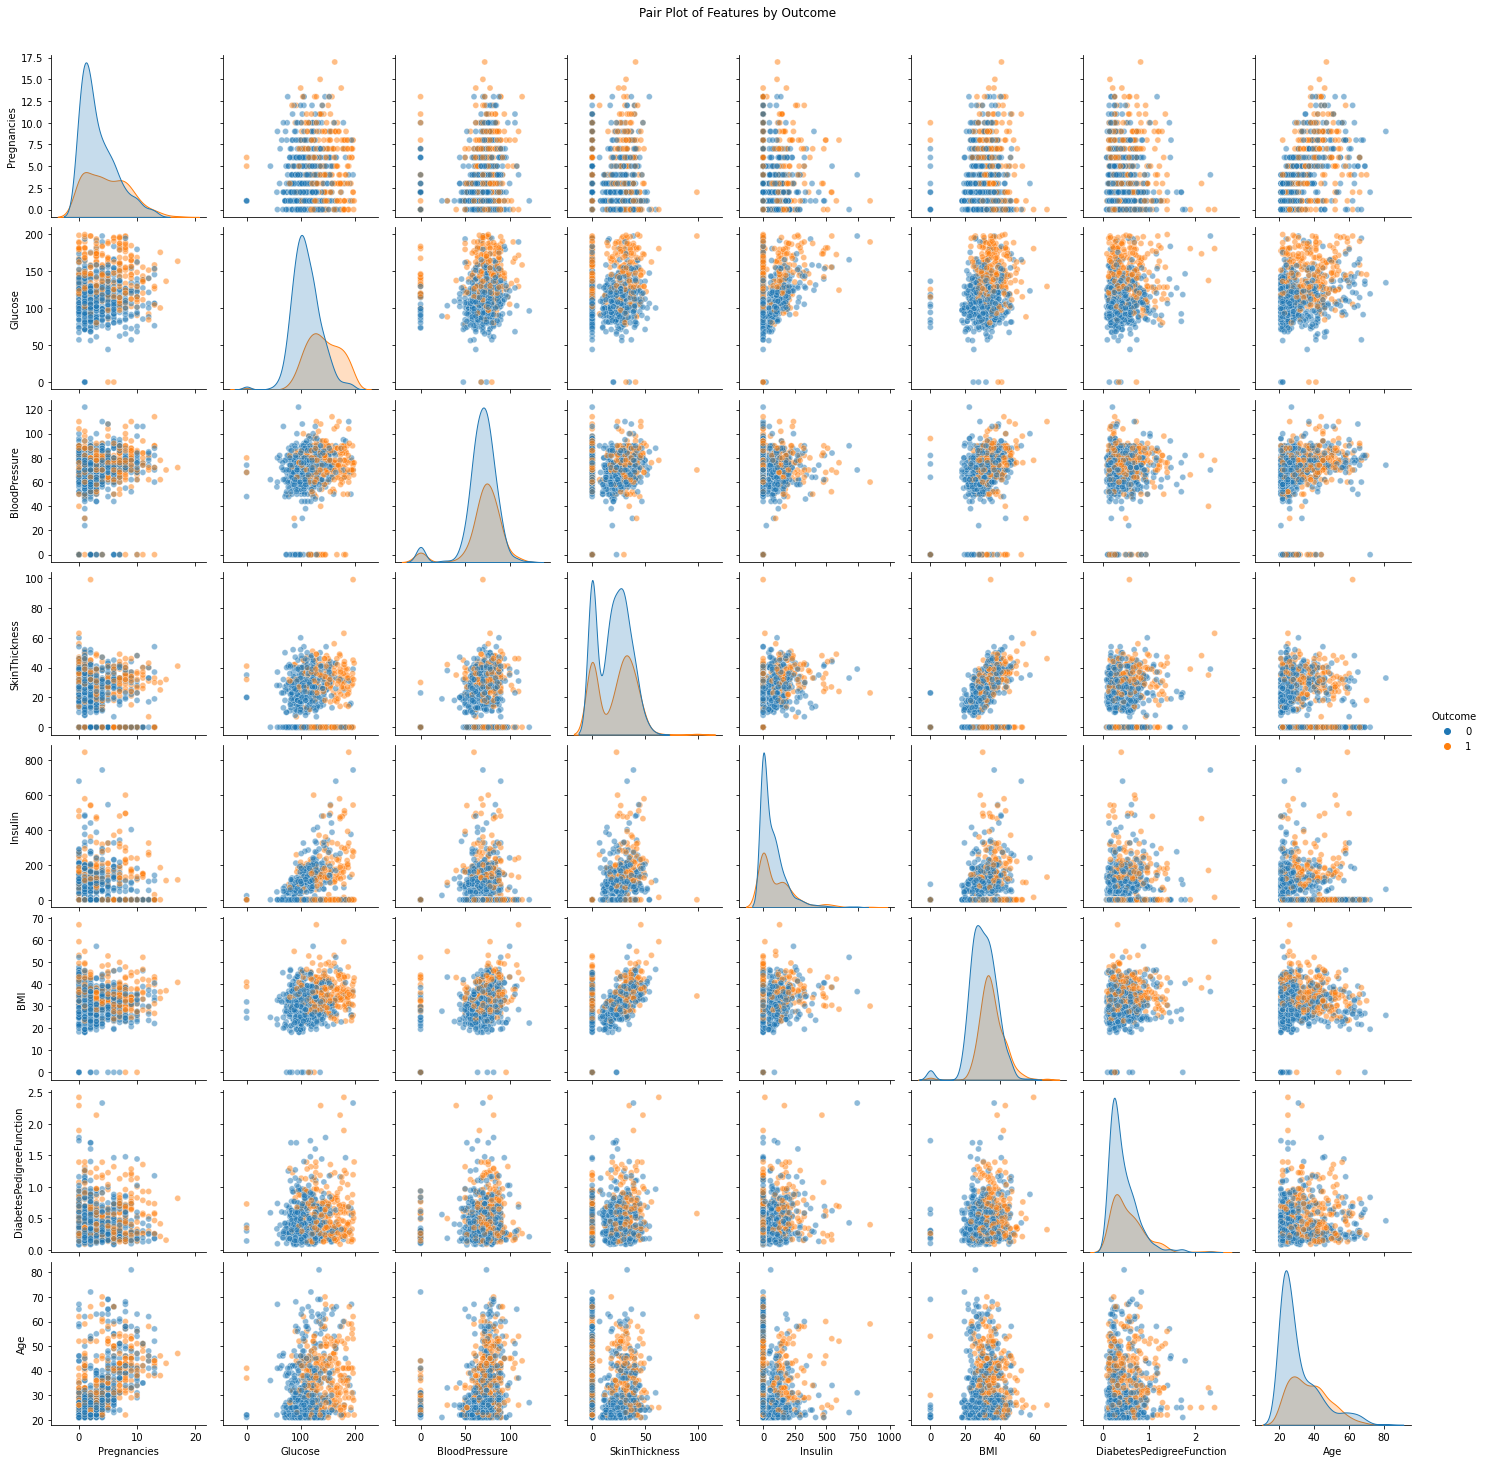

In [71]:
# CREATE A PAIR PLOT TO VISUALIZE THE BIVARIATE RELATION BETWEEN FEATURES
sns.pairplot(df, diag_kind='kde', hue='Outcome', markers='o', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Features by Outcome', y=1.02)
plt.show()

# Model Training: 5 Classification Algorithms have been used to find out the best one. These are Logistic Regression, Support Vector Machine, Random Forest, K-Nearest Neighbours, and Naive Bayes.

In each of the algorithms, the steps followed are as follows:

### 1. Importing the library for the algorithm.

In [77]:
# Import libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [73]:
# Import libraries for Support Vector Machine
from sklearn.svm import SVC

In [74]:
# Import libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier

In [75]:
# Import libraries for K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# Import libraries for Naive Bayes
from sklearn.naive_bayes import GaussianNB

### 2. Creating an instance of the Classifier (with default values of parameters or by specifying certain values in certain cases).

In [83]:
# Create an instance of Logistic Regression with default parameters
logistic_regression = LogisticRegression()

In [79]:
# Create an instance of Support Vector Machine with specified parameters
svm = SVC(kernel='linear', C=1.0)

In [80]:
# Create an instance of Random Forest with default parameters
random_forest = RandomForestClassifier()

In [81]:
# Create an instance of K-Nearest Neighbors with specified parameters
knn = KNeighborsClassifier(n_neighbors=5)

In [82]:
# Create an instance of Naive Bayes with default parameters
naive_bayes = GaussianNB()

### 3. Training the model on the train set.

In [96]:
X = df.drop('Outcome', axis=1)  # Drop the 'Outcome' column as features (X)
y = df['Outcome'] 

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create instances of classifiers with default parameter values
logreg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()

# Train the classifiers on the training set
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)


C:\Users\user\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

### 4. Prediction on the test set using the trained model.

In [95]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Assuming the classifiers (logreg, svm, rf, knn, nb) are already trained on the training set
# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Evaluate the performance of the classifiers
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('Support Vector Machine Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
print('K-Nearest Neighbors Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred_nb))
print('---')
print('Logistic Regression Precision:', precision_score(y_test, y_pred_logreg))
print('Support Vector Machine Precision:', precision_score(y_test, y_pred_svm))
print('Random Forest Precision:', precision_score(y_test, y_pred_rf))
print('K-Nearest Neighbors Precision:', precision_score(y_test, y_pred_knn))
print('Naive Bayes Precision:', precision_score(y_test, y_pred_nb))
print('---')
print('Logistic Regression Recall:', recall_score(y_test, y_pred_logreg))
print('Support Vector Machine Recall:', recall_score(y_test, y_pred_svm))
print('Random Forest Recall:', recall_score(y_test, y_pred_rf))
print('K-Nearest Neighbors Recall:', recall_score(y_test, y_pred_knn))
print('Naive Bayes Recall:', recall_score(y_test, y_pred_nb))
print('---')
print('Logistic Regression F1 Score:', f1_score(y_test, y_pred_logreg))
print('Support Vector Machine F1 Score:', f1_score(y_test, y_pred_svm))
print('Random Forest F1 Score:', f1_score(y_test, y_pred_rf))
print('K-Nearest Neighbors F1 Score:', f1_score(y_test, y_pred_knn))
print('Naive Bayes F1 Score:', f1_score(y_test, y_pred_nb))

Logistic Regression Accuracy: 0.7532467532467533
Support Vector Machine Accuracy: 0.7662337662337663
Random Forest Accuracy: 0.7337662337662337
K-Nearest Neighbors Accuracy: 0.6623376623376623
Naive Bayes Accuracy: 0.7662337662337663
---
Logistic Regression Precision: 0.6491228070175439
Support Vector Machine Precision: 0.7209302325581395
Random Forest Precision: 0.625
K-Nearest Neighbors Precision: 0.5245901639344263
Naive Bayes Precision: 0.6610169491525424
---
Logistic Regression Recall: 0.6727272727272727
Support Vector Machine Recall: 0.5636363636363636
Random Forest Recall: 0.6363636363636364
K-Nearest Neighbors Recall: 0.5818181818181818
Naive Bayes Recall: 0.7090909090909091
---
Logistic Regression F1 Score: 0.6607142857142858
Support Vector Machine F1 Score: 0.6326530612244898
Random Forest F1 Score: 0.6306306306306306
K-Nearest Neighbors F1 Score: 0.5517241379310346
Naive Bayes F1 Score: 0.6842105263157895


### 5. Calculating the accuracy of the prediction.

In [97]:
from sklearn.metrics import accuracy_score

# Assuming the classifiers (logreg, svm, rf, knn, nb) are already trained on the training set
# Assuming the predictions (y_pred_logreg, y_pred_svm, y_pred_rf, y_pred_knn, y_pred_nb) are already made on the test set

# Calculate accuracy for each classifier
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Print accuracy for each classifier
print('Logistic Regression Accuracy:', accuracy_logreg)
print('Support Vector Machine Accuracy:', accuracy_svm)
print('Random Forest Accuracy:', accuracy_rf)
print('K-Nearest Neighbors Accuracy:', accuracy_knn)
print('Naive Bayes Accuracy:', accuracy_nb)

Logistic Regression Accuracy: 0.7532467532467533
Support Vector Machine Accuracy: 0.7662337662337663
Random Forest Accuracy: 0.7337662337662337
K-Nearest Neighbors Accuracy: 0.6623376623376623
Naive Bayes Accuracy: 0.7662337662337663
